In [1]:
%matplotlib inline
from datetime import datetime

import pandas as pd
import numpy as np

In [2]:
house_id = 'C'
meter_number = 1
dfs = []

for year in [2014, 2015, 2016]:

    power_df = pd.read_csv(f'./Home{house_id}/{year}/Home{house_id}-meter{meter_number}_{year}.csv')
    power_df.rename(columns={'Date & Time': 'time'}, inplace=True)
    power_df['time'] = power_df['time'].map(lambda x: datetime.strptime(x, '%Y-%m-%d %H:%M:%S'))

    weather_df = pd.read_csv(f'./Home{house_id}/home{house_id}{year}.csv')
    weather_df['time'] = weather_df['time'].map(lambda x: datetime.utcfromtimestamp(x - 3600*5))
    merge_df = pd.merge(power_df, weather_df, on='time', how='left')
    dfs.append(merge_df)

In [3]:
df = pd.concat(dfs)
df = df.interpolate().fillna(method='ffill')
df = df.set_index('time', drop=True)

In [4]:
df.isna().sum()

use [kW]               0
gen [kW]               0
House overall [kW]     0
Dishwasher [kW]        0
Furnace 1 [kW]         0
Furnace 2 [kW]         0
Home office [kW]       0
Fridge [kW]            0
Wine cellar [kW]       0
Garage door [kW]       0
Kitchen 12 [kW]        0
Kitchen 14 [kW]        0
Kitchen 38 [kW]        0
Barn [kW]              0
Well [kW]              0
Microwave [kW]         0
Living room [kW]       0
Solar [kW]             0
temperature            0
icon                   0
humidity               0
visibility             0
summary                0
apparentTemperature    0
pressure               0
windSpeed              0
cloudCover             0
windBearing            0
precipIntensity        0
dewPoint               0
precipProbability      0
dtype: int64

In [11]:
df['Furnace'] = df['Furnace 1 [kW]']+df['Furnace 2 [kW]']

In [13]:
(df['Furnace']).describe()

count    561194.000000
mean          0.238664
std           0.272609
min           0.000283
25%           0.085200
50%           0.089133
75%           0.226546
max           2.473550
Name: Furnace, dtype: float64

limit = 0.09

In [47]:
df.to_csv('HomeC.csv')

## Find appliance on/off threshold

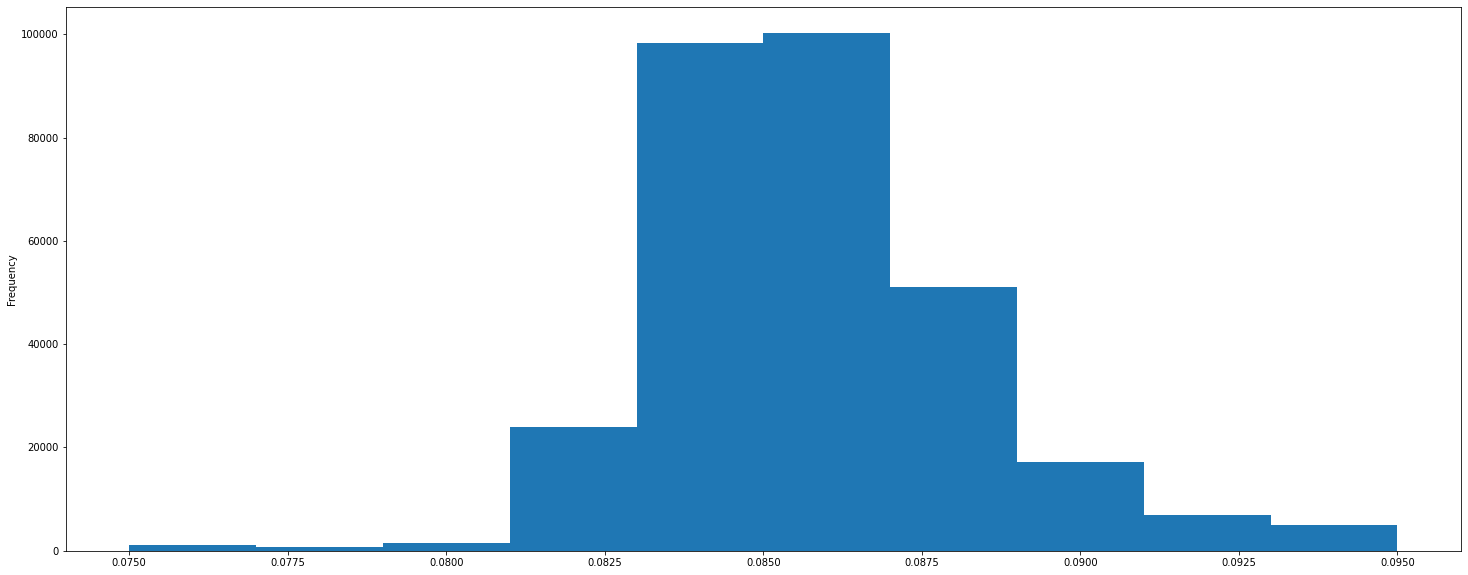

In [46]:
(df['Furnace'].loc[lambda x: (x < 0.095) & (x> 0.075)]).plot(kind='hist', figsize=(25,10))